In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import os
os.getcwd()

'/aiffel/aiffel'

In [21]:
trip_df = pd.read_csv('/aiffel/data/trip.csv')

In [22]:
trip_df.head(3)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0


In [23]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [24]:
trip_df.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [25]:
trip_df.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [26]:
#결측치 확인 및 수정

trip_df[trip_df['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [27]:
#결측치값을 평균값으로 대체
trip_df['fare_amount']=trip_df['fare_amount'].fillna(trip_df['fare_amount'].mean())

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='passenger_count'>

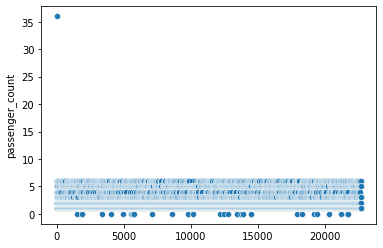

In [28]:
#변수값의 이상치 확인 : passenger_count

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(trip_df.index, trip_df['passenger_count'])

In [29]:
#1.변수값의 이상치 확인
trip_df[trip_df['passenger_count']>30]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
64,Manuel Dickson,10/05/2017 9:39:28 AM,10/05/2017 9:42:32 AM,Debit Card,36,0.22,21.5,0.0,0.0


In [30]:
#1.이상치 제거 : 확인결과 이상치 맞음
trip_df=trip_df[trip_df['passenger_count']<30]

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='trip_distance'>

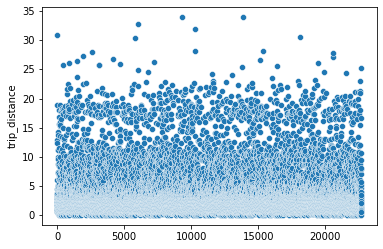

In [31]:
#2.변수값의 이상치 확인 : trip_distance
sns.scatterplot(trip_df.index, trip_df['trip_distance'])

In [33]:
#2.이상치 확인 : trip_distance
trip_df[trip_df['trip_distance']==0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
129,Linda Kaufman,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,Debit Card,1,0.0,20.0,0.00,0.0
248,Erik Perez,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,Cash,1,0.0,2.5,0.00,0.0
293,Deborah Sanford,10/04/2017 7:46:24 PM,10/04/2017 7:46:50 PM,Cash,1,0.0,2.5,0.00,0.0
321,Ryan Hughes,02/22/2017 4:01:44 AM,02/22/2017 4:01:53 AM,Cash,1,0.0,2.5,0.00,0.0
426,David Parker,01/14/2017 7:00:26 AM,01/14/2017 7:00:53 AM,Cash,1,0.0,2.5,6.70,0.0
...,...,...,...,...,...,...,...,...,...
22192,Angela French,10/16/2017 8:34:07 AM,10/16/2017 8:34:10 AM,Credit Card,1,0.0,2.5,0.00,0.0
22327,Kelsey Rogers,07/21/2017 11:30:29 PM,07/21/2017 11:31:12 PM,Debit Card,1,0.0,16.8,3.42,0.0
22385,Joseph Castillo,01/07/2017 4:48:42 AM,01/07/2017 4:51:03 AM,Cash,1,0.0,10.0,0.00,0.0
22568,Christine Edwards,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,Credit Card,1,0.0,0.0,0.00,0.0


In [34]:
#2.이상치 확인 : 이동거리가 0인 데이터가 이상치인가 했으나 기본요금이 2.5인듯하여 미삭제 결정
trip_df[trip_df['fare_amount']==2.5]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
248,Erik Perez,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,Cash,1,0.00,2.5,0.00,0.0
293,Deborah Sanford,10/04/2017 7:46:24 PM,10/04/2017 7:46:50 PM,Cash,1,0.00,2.5,0.00,0.0
321,Ryan Hughes,02/22/2017 4:01:44 AM,02/22/2017 4:01:53 AM,Cash,1,0.00,2.5,0.00,0.0
325,Valerie Mullen,01/14/2017 7:04:51 PM,01/14/2017 7:05:01 PM,Cash,2,0.02,2.5,0.00,0.0
426,David Parker,01/14/2017 7:00:26 AM,01/14/2017 7:00:53 AM,Cash,1,0.00,2.5,6.70,0.0
...,...,...,...,...,...,...,...,...,...
22104,Renee Bowen,07/11/2017 2:42:04 PM,07/11/2017 2:42:06 PM,Credit Card,1,1.10,2.5,0.00,0.0
22192,Angela French,10/16/2017 8:34:07 AM,10/16/2017 8:34:10 AM,Credit Card,1,0.00,2.5,0.00,0.0
22525,Lisa Jacobs,04/26/2017 7:03:15 PM,04/26/2017 7:03:38 PM,Debit Card,2,0.08,2.5,1.29,0.0
22672,John Erickson,03/03/2017 11:09:16 PM,03/03/2017 11:09:35 PM,Debit Card,1,0.00,2.5,0.00,0.0


In [37]:
#2.이상치 확인 : 이동거리,시간 등과 요금을 함께 볼 경우 아주 비정상적인 수치는 없음
trip_df[trip_df['trip_distance']>25].sort_values(by='trip_distance')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
22670,Shirley Ferguson,02/22/2017 6:45:04 AM,02/22/2017 7:19:34 AM,Debit Card,5,25.30,67.50,17.08,0.00
13818,Dr. Taylor Thompson,04/25/2017 2:47:58 PM,04/25/2017 3:54:34 PM,Cash,1,25.40,52.00,11.70,5.76
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
416,Melanie Wu,02/18/2017 12:44:04 PM,02/18/2017 1:29:10 PM,Debit Card,6,25.69,69.50,14.06,0.00
3114,Nathan Hernandez,10/18/2017 11:59:22 AM,10/18/2017 12:48:32 PM,Cash,1,25.70,52.00,0.00,5.76
3140,Amanda Franklin,01/03/2017 5:21:57 PM,01/03/2017 6:25:04 PM,Cash,2,25.80,85.50,0.00,5.54
4717,John Parker,09/17/2017 8:04:24 PM,09/17/2017 9:02:24 PM,Cash,1,25.86,78.00,0.00,5.76
910,Sue Hill,03/27/2017 1:01:38 PM,03/27/2017 1:38:44 PM,Credit Card,2,26.12,100.00,15.00,5.76
19485,Jeremy Thompson PhD,04/26/2017 8:31:31 AM,04/26/2017 11:10:50 AM,Debit Card,1,26.12,52.00,0.00,5.76
7219,Melissa Green,02/20/2017 2:28:11 PM,02/20/2017 3:29:14 PM,Cash,1,26.20,74.00,0.00,0.00


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='fare_amount'>

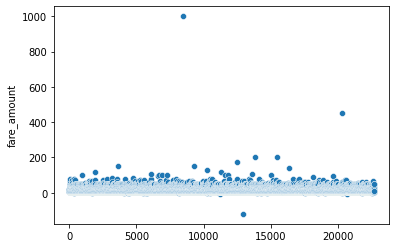

In [38]:
#3.변수값의 이상치 확인 : fare_amount
sns.scatterplot(trip_df.index, trip_df['fare_amount'])

In [45]:
#3.이상치 확인 : fare_amount
trip_df[(trip_df['fare_amount']>300) | (trip_df['fare_amount']<0)].sort_values(by='fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
12946,Patrick Herring,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,Cash,1,0.17,-120.00,0.0,0.0
11206,Austin Fields,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,Debit Card,1,0.64,-4.50,0.0,0.0
20700,Nicole Pierce,02/24/2017 12:38:17 AM,02/24/2017 12:42:05 AM,Cash,1,0.70,-4.50,0.0,0.0
14716,Stefanie Warner,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,Debit Card,5,0.40,-4.00,0.0,0.0
17604,Tyler Lowe,03/24/2017 7:31:13 PM,03/24/2017 7:34:49 PM,Cash,1,0.46,-4.00,0.0,0.0
5450,Alejandro Williams,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,Debit Card,1,0.25,-3.50,0.0,0.0
8206,Stephanie Summers,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,Credit Card,1,0.41,-3.50,0.0,0.0
20319,Tyler Robinson,09/09/2017 10:59:51 PM,09/09/2017 11:02:06 PM,Debit Card,1,0.24,-3.50,0.0,0.0
4425,Bobby Wilson,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,Cash,2,0.06,-3.00,0.0,0.0
18567,Selena Mann,05/22/2017 3:51:20 PM,05/22/2017 3:52:22 PM,Cash,1,0.10,-3.00,0.0,0.0


In [46]:
#3.이상치 제거 : fare_amount
trip_df = trip_df[~((trip_df['fare_amount'] > 300) | (trip_df['fare_amount'] < 0))]


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='tip_amount'>

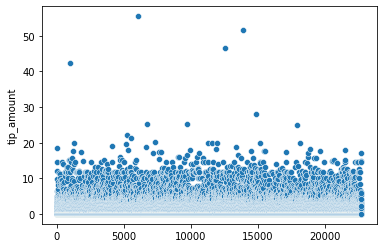

In [47]:
#4.변수값의 이상치 확인 : tip_amount
sns.scatterplot(trip_df.index, trip_df['tip_amount'])

In [51]:
#4.이상치 확인 : tip_amount : 팁은 기분따라 주는거니까 이상치 판정 불가 판단
trip_df[trip_df['tip_amount']>20]
#4.이상치 없음 판단

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
986,Elaine Horton,08/23/2017 6:23:26 PM,08/23/2017 7:18:29 PM,Cash,1,16.70,52.00,42.29,0.00
5212,Randy Martinez,05/22/2017 4:28:23 PM,05/22/2017 4:29:01 PM,Debit Card,1,0.00,52.00,22.22,5.76
5538,Alexander Giles Jr.,03/16/2017 12:14:51 PM,03/16/2017 12:52:36 PM,Cash,1,17.50,69.50,21.30,15.50
6066,Tina Knight,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,Debit Card,1,32.72,107.00,55.50,16.26
6710,Nicholas Charles,10/30/2017 11:23:46 AM,10/30/2017 11:23:49 AM,Credit Card,1,0.32,100.00,25.20,0.00
7283,Phillip Vasquez,01/01/2017 3:02:53 AM,01/01/2017 3:03:02 AM,Credit Card,1,0.00,100.00,20.16,0.00
9716,Miss Karen Smith,09/28/2017 11:56:23 AM,09/28/2017 12:21:12 PM,Cash,1,10.02,30.00,25.20,5.76
12513,Mr. Wesley Reyes,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,Cash,1,0.00,175.00,46.69,11.75
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76
14827,John Greer,11/28/2017 8:47:09 PM,11/28/2017 9:22:38 PM,Debit Card,1,20.90,57.50,28.00,2.64


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='tolls_amount'>

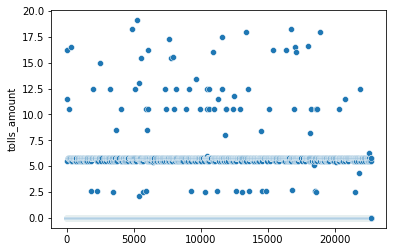

In [49]:
#5.변수값의 이상치 확인 : tolls_amount
sns.scatterplot(trip_df.index, trip_df['tolls_amount'])

In [55]:
#4.이상치 확인 : 톨비는 어디로 갔는냐에 달린거라 판단어려움. 수치상 상식선에서 벗어나는 톨비는 없는듯
trip_df[(trip_df['tolls_amount']<0)|(trip_df['tolls_amount']>15)].sort_values(by='tolls_amount')
#4.이상치 없음 판단

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
5538,Alexander Giles Jr.,03/16/2017 12:14:51 PM,03/16/2017 12:52:36 PM,Cash,1,17.50,69.50,21.30,15.50
7748,Jonathan Lloyd,01/24/2017 11:48:23 AM,01/24/2017 12:34:10 PM,Cash,2,18.13,71.00,17.36,15.50
7931,James Blackburn,01/10/2017 10:35:22 AM,01/10/2017 11:07:05 AM,Credit Card,2,17.53,75.00,0.00,15.58
10877,Thomas Smith,07/23/2017 3:46:30 PM,07/23/2017 4:20:50 PM,Cash,2,14.67,61.50,15.56,16.00
17113,Seth Olsen,03/17/2017 5:21:30 AM,03/17/2017 5:52:41 AM,Debit Card,1,22.03,76.00,10.00,16.00
15423,Robert Bautista,11/03/2017 1:43:08 PM,11/03/2017 2:29:27 PM,Cash,2,18.17,72.00,17.70,16.20
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
22,Jacqueline Mclean DVM,10/11/2017 12:34:49 PM,10/11/2017 1:22:38 PM,Debit Card,1,12.30,68.25,12.00,16.26
6066,Tina Knight,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,Debit Card,1,32.72,107.00,55.50,16.26
17048,Alexander Carr,06/03/2017 6:47:42 AM,06/03/2017 7:17:08 AM,Debit Card,1,20.00,70.50,17.45,16.50


In [56]:
#최종과제 : 택시요금 구하기

trip_df['택시요금'] = trip_df['fare_amount']+trip_df['tip_amount']+trip_df['tolls_amount']

In [57]:
trip_df.head(5)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,택시요금
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0,15.76
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0,20.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0,7.95
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,26.89
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0,16.50


In [58]:
# 심화과제 : 택시 탑승시간 구하기
trip_df['tpep_pickup_datetime']=pd.to_datetime(trip_df['tpep_pickup_datetime'])
trip_df['tpep_dropoff_datetime']=pd.to_datetime(trip_df['tpep_dropoff_datetime'])

In [61]:
trip_df['tpep_duration'] = trip_df['tpep_dropoff_datetime']-trip_df['tpep_pickup_datetime']
trip_df[trip_df['tpep_duration']< pd.Timedelta(0)]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,택시요금,tpep_duration
9358,Donna Summers,2017-11-05 01:23:08,2017-11-05 01:06:09,Cash,1,5.7,28.0,0.0,0.0,28.0,-1 days +23:43:01


In [62]:
trip_df = trip_df[trip_df['tpep_duration']>= pd.Timedelta(0)]

In [63]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22683 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         22683 non-null  object         
 1   tpep_pickup_datetime   22683 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  22683 non-null  datetime64[ns] 
 3   payment_method         22683 non-null  object         
 4   passenger_count        22683 non-null  int64          
 5   trip_distance          22683 non-null  float64        
 6   fare_amount            22683 non-null  float64        
 7   tip_amount             22683 non-null  float64        
 8   tolls_amount           22683 non-null  float64        
 9   택시요금                   22683 non-null  float64        
 10  tpep_duration          22683 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(5), int64(1), object(2), timedelta64[ns](1)
memory usage: 2.1+ MB
